# Fitting SFG Curves with Multiple Resonant Peaks
Using the iminuit package, select a window of SFG spectra and perform a non-linear fit of nonresonant and a variable number ($N^{res}$) of resonant peaks accoring to the equation
$$ \mathrm{SFG}(\omega) = \left| A^{nonres}e^{i\phi} + \sum_{j=0}^{N^{res}}\frac{A^{res}_j}{\omega - \omega^{res}_j+i\Gamma_j}\right|^2 $$
where the parameters that we want to determine are the nonresonant amplitue ($A^{nonres}$) and phase ($\phi$), as well as the amplitude, position, and width of each resonant peak ($A^{res}_j$, $\omega^{res}_j$, and $\Gamma_j$, respectively).

Developers : Oliviero Andreussi, Lindsey Jenkins, XXX, XXX, Jenee Cyran


## Mount the Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import External Modules

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
!pip install iminuit
from iminuit import Minuit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.4/427.4 kB 4.7 MB/s eta 0:00:00


## Define Basic Functions for the Fitting

In [3]:
# Basic functions for the fitting of nonresonant and resonant peaks
def chi_non_resonant(nr: float, phase: float) -> np.complex128 :
  """
  Given the non-resonant parameters return a single complex-valued number
  for the non-resonant process
  """
  ChiNR = nr * np.exp(1j * phase)
  return ChiNR

def chi_resonant(wavenumbers: np.ndarray[np.float64], amplitude: float, pos: float, width: float) -> np.ndarray[np.complex128]:
  """
  Given a range of wavenumbers and the parameters of a resonant peak return
  the complex values of the peak for each wavenumber
  """
  A = amplitude
  delta = wavenumbers - pos
  gamma = width / 2
  ChiR_i = -(A * gamma / (delta**2 + gamma**2))
  ChiR_r = A * delta / (delta**2 + gamma**2)
  ChiR = ChiR_r + (1j * ChiR_i)
  return ChiR

## Load Data

In [4]:
# Data should be cleaned using MATLAB data cleaner first
path = '/content/drive/MyDrive/SFG/'
#x = pd.read_csv(path+'xaxis.csv',names=['Wavenumbers'],skiprows=1) #skips header
#y = pd.read_csv(path+'yaxis.csv',names=['SFG'],skiprows=1) #change name to what sample it is

# Uncomment to make sure that the size of the arrays are the same size
# x.shape
# y.shape
# Makes the arrays into a data structure
#data = pd.concat([x,y],axis=1)
data = pd.read_csv(path+'cleanIce8.csv',names=['Wavenumbers','SFG'],skiprows=1)

## Plot of data

<Axes: xlabel='Wavenumbers'>

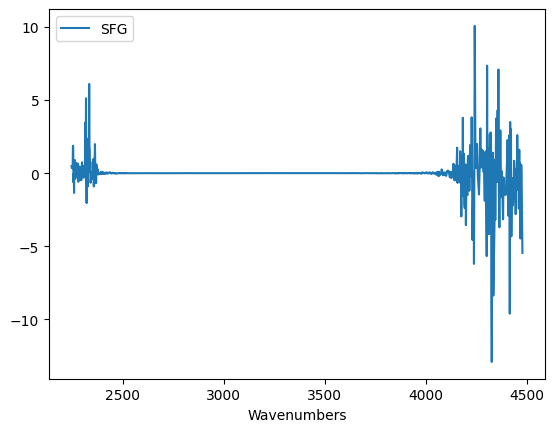

In [5]:
data.plot('Wavenumbers', 'SFG')

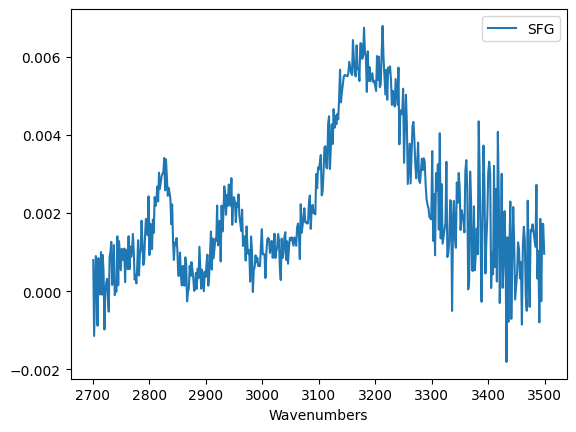

In [6]:
# @title Resize the window of the spectrum { display-mode: "form" }
WMin = 2700 # @param {type:"number"}
WMax  = 3500 # @param {type:"number"}
filtered_data = data.query(f'Wavenumbers > {WMin} and Wavenumbers < {WMax}')
# Plots the data with the new range
filtered_data.plot('Wavenumbers','SFG')
wavenumbers = filtered_data['Wavenumbers'].values
sfg = filtered_data['SFG'].values

## Fit a Single Resonant Peak

In [ ]:
# Parameters for each peak
# Change to parameters in water
nr = { "amplitude": 0.10399,
       "phase": np.pi }
r0 = { "amplitude" : 2,
       "pos" : 3270.,
       "width" : 20 }
r1 = { "amplitude": 16.1201,
       "pos": 3325,
       "width": 200 }

In [ ]:
chi_non_resonant(nr['amplitude'],nr['phase'])

(-0.10399+1.2735102064333326e-17j)

In [ ]:
chi_resonant(filtered_data['Wavenumbers'],r0['amplitude'],r0['pos'],r0['width'])

533     0.008723-0.000381j
534     0.008789-0.000387j
535     0.008856-0.000393j
536     0.008923-0.000399j
537     0.008992-0.000405j
               ...        
1023   -0.003553-0.000063j
1024   -0.003543-0.000063j
1025   -0.003534-0.000062j
1026   -0.003525-0.000062j
1027   -0.003515-0.000062j
Name: Wavenumbers, Length: 495, dtype: complex128

In [ ]:
# functions to fit and cost functions, with explicit parameters
# NOTE: these functions use wavenumbers and sfg defined in the global
# scope of the notebook

def calcamplitude(nr, phase, amplitude, pos, width):
  ChiNR = chi_non_resonant(nr, phase)
  ChiR = chi_resonant(wavenumbers, amplitude, pos, width)
  Chi = ChiNR + ChiR
  return np.square(Chi.real) + np.square(Chi.imag)

def costfunction(nr, phase, amplitude, pos, width):
  return np.sum((sfg - calcamplitude(nr, phase, amplitude, pos, width))**2)

In [ ]:
calcamplitude(nr['amplitude'],nr['phase'],r0['amplitude'],r0['pos'],r0['width'])

array([0.00907589, 0.00906338, 0.00905069, 0.00903782, 0.00902476,
       0.00901152, 0.00899808, 0.00898444, 0.00897061, 0.00895656,
       0.00894231, 0.00892784, 0.00891315, 0.00889823, 0.00888309,
       0.0088677 , 0.00885208, 0.00883621, 0.00882008, 0.0088037 ,
       0.00878705, 0.00877013, 0.00875292, 0.00873544, 0.00871766,
       0.00869958, 0.00868119, 0.00866249, 0.00864347, 0.00862411,
       0.00860441, 0.00858436, 0.00856396, 0.00854318, 0.00852203,
       0.00850048, 0.00847854, 0.00845619, 0.00843341, 0.0084102 ,
       0.00838655, 0.00836243, 0.00833784, 0.00831277, 0.00828719,
       0.0082611 , 0.00823448, 0.00820731, 0.00817957, 0.00815125,
       0.00812233, 0.0080928 , 0.00806262, 0.00803178, 0.00800027,
       0.00796805, 0.0079351 , 0.0079014 , 0.00786693, 0.00783165,
       0.00779554, 0.00775857, 0.00772071, 0.00768192, 0.00764218,
       0.00760145, 0.0075597 , 0.00751687, 0.00747295, 0.00742787,
       0.00738161, 0.0073341 , 0.00728531, 0.00723519, 0.00718

Trying to see if the parameters we chose are reasonable for the data

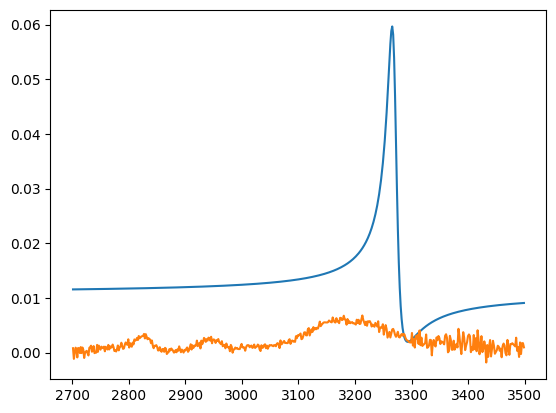

In [ ]:
plt.plot(filtered_data['Wavenumbers'],calcamplitude(nr['amplitude'],nr['phase'],r0['amplitude'],r0['pos'],r0['width']))
plt.plot(filtered_data['Wavenumbers'],filtered_data['SFG'])

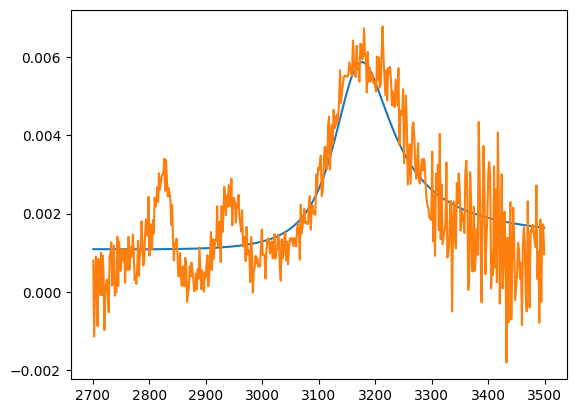

In [ ]:
# @title Adjust the initial parameters to check the convergence of the fit { display-mode: "form" }
nonres_amplitude = 0.1 # @param {type:"number"}
nonres_phase  = 3.14# @param {type:"number"}
res_amplitude = 0.005 # @param {type:"number"}
res_pos = 3200 # @param {type:"number"}
res_width = 30 # @param {type:"number"}

fitting_args = {'nr': nonres_amplitude, 'phase': nonres_phase, 'amplitude': res_amplitude, 'pos': res_pos, 'width': res_width}
fit = Minuit(costfunction, **fitting_args)
# Ranges should only be positive
fit.limits["nr"] = (0, None)
fit.limits["phase"] = (0, 2*np.pi)
fit.limits["amplitude"] = (0, None)
fit.limits["pos"] = (WMin, WMax)
fit.limits["width"] = (0, None)

# perform the fit
fit.migrad()

# plot result of fit with optimized parameters vs. experiment
plt.plot(filtered_data['Wavenumbers'],calcamplitude(fit.params[0].value,fit.params[1].value,fit.params[2].value,fit.params[3].value,fit.params[4].value))
plt.plot(filtered_data['Wavenumbers'],filtered_data['SFG'])

This step performs the actual optmization of the parameters (the results look cool, not sure what all these numbers mean...)

In [ ]:
fit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.0003654                  │              Nfcn = 340              │
│ EDM = 1.07e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name      │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ nr        │     0     │     4     │            │            │    0    │         │       │
│ 1 │ phase     │     5     │     4     │            │            │    0    │ 6.28319 │       │
│ 2 │ amplitude │     0     │  0.18e3   │            │            │    0    │         │       │
│ 3 │ pos       │   3.2e3   │   0.6e3   │            │            │  2700   │  3500   │       │
│ 4 │ width     │    0e3    │    8e3    │            │            │    0    │         │       │
└───┴───────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────────┬───────────────────────────────────────────────────┐
│           │        nr     phase amplitude       pos     width │
├───────────┼───────────────────────────────────────────────────┤
│        nr │      1.16      51.5    -160.2 -2.3549e3 -4.7364e3 │
│     phase │      51.5  9.28e+03      -6e3    -363e3    -257e3 │
│ amplitude │    -160.2      -6e3  3.34e+04   0.273e6   1.210e6 │
│       pos │ -2.3549e3    -363e3   0.273e6  1.99e+07   0.011e9 │
│     width │ -4.7364e3    -257e3   1.210e6   0.011e9  6.05e+07 │
└───────────┴───────────────────────────────────────────────────┘

Initial parameters

In [ ]:
fit.init_params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,nr,0.100,0.001,,,0,,
1,phase,3.140,0.031,,,0,6.28,
2,amplitude,5.00e-3,0.05e-3,,,0,,
3,pos,3.200e3,0.032e3,,,2.7E+03,3.5E+03,
4,width,30.0,0.3,,,0,,


Optimized parameters

In [ ]:
fit.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,nr,0,4,,,0,,
1,phase,5,4,,,0,6.28,
2,amplitude,0,0.18e3,,,0,,
3,pos,3.2e3,0.6e3,,,2.7E+03,3.5E+03,
4,width,0e3,8e3,,,0,,


We can access the final value and associated error with the .value and .error attributes

In [ ]:
print(fit.params[0].value,fit.params[0].error)

0.0300265719405461 3.5677701883776427


Now we can reuse the calcamplitude function with the optimal parameters to compare to the experimental data

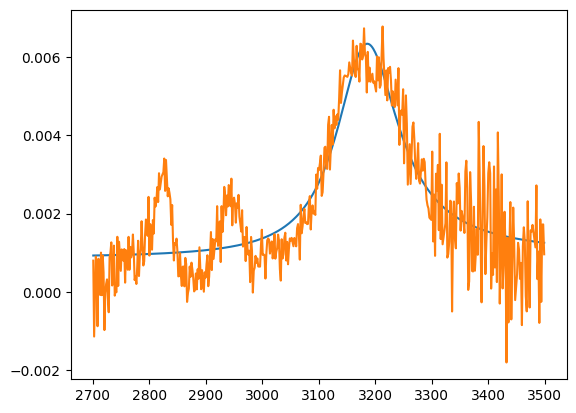

In [ ]:
plt.plot(filtered_data['Wavenumbers'],calcamplitude(fit.params[0].value,fit.params[1].value,fit.params[2].value,fit.params[3].value,fit.params[4].value))
plt.plot(filtered_data['Wavenumbers'],filtered_data['SFG'])

## Still only one resonant peak, but with a more flexible implementation

This creates a new dictionary with all the parameters from the individual components we want to fit

In [ ]:
maxnres = 5 # global parameter with the maximum number of resonant peaks that we will ever need

In [ ]:
fitting_dictionaries = { 'nr' : nr, 'r0' : r0 }
parameters = {}
for label, dictionary in fitting_dictionaries.items() :
  new = { label+'_'+k:v for k, v in dictionary.items()}
  parameters = {**parameters,**new}
print(parameters)

{'nr_amplitude': 0.10399, 'nr_phase': 3.141592653589793, 'r0_amplitude': 2, 'r0_pos': 3270.0, 'r0_width': 20}


In [ ]:
parameters.keys()

dict_keys(['nr_amplitude', 'nr_phase', 'r0_amplitude', 'r0_pos', 'r0_width'])

In [ ]:
wavenumbers = filtered_data['Wavenumbers'].values
sfg = filtered_data['SFG'].values
# This implementation has a flexible fitting function, but the cost function still needs explicit parameters
def calcamplitude(**kwds):
  Chi = np.zeros(sfg.shape,dtype=np.complex128)
  if 'nr_amplitude' in kwds.keys():
    ChiNR = chi_non_resonant(kwds['nr_amplitude'], kwds['nr_phase'])
    Chi = Chi + ChiNR
  for i in range(maxnres):
    if 'r'+str(i)+'_amplitude' in kwds.keys():
       ChiR = chi_resonant(wavenumbers, kwds['r'+str(i)+'_amplitude'], kwds['r'+str(i)+'_pos'], kwds['r'+str(i)+'_width'])
       Chi = Chi + ChiR
  return np.square(Chi.real) + np.square(Chi.imag)

def cost0(nr_amplitude, nr_phase, r0_amplitude, r0_pos, r0_width):
  return np.sum((sfg - calcamplitude(nr_amplitude=nr_amplitude, nr_phase=nr_phase, \
                                     r0_amplitude=r0_amplitude, r0_pos=r0_pos, r0_width=r0_width))**2)


In [ ]:
chi_non_resonant(0.10399, np.pi)

(-0.10399+1.2735102064333326e-17j)

In [ ]:
chi_resonant(wavenumbers, parameters['r0_amplitude'], parameters['r0_pos'], parameters['r0_width'])

array([ 0.0087233 -3.81206618e-04j,  0.00878902-3.86982883e-04j,
        0.00885571-3.92889840e-04j,  0.0089234 -3.98931446e-04j,
        0.00899212-4.05111810e-04j,  0.00906189-4.11435198e-04j,
        0.00913272-4.17906043e-04j,  0.00920465-4.24528946e-04j,
        0.0092777 -4.31308694e-04j,  0.0093519 -4.38250261e-04j,
        0.00942727-4.45358817e-04j,  0.00950384-4.52639745e-04j,
        0.00958165-4.60098642e-04j,  0.00966072-4.67741335e-04j,
        0.00974108-4.75573890e-04j,  0.00982276-4.83602628e-04j,
        0.0099058 -4.91834132e-04j,  0.00999023-5.00275262e-04j,
        0.01007609-5.08933172e-04j,  0.01016341-5.17815324e-04j,
        0.01025223-5.26929500e-04j,  0.01034259-5.36283825e-04j,
        0.01043453-5.45886781e-04j,  0.01052809-5.55747226e-04j,
        0.01062331-5.65874416e-04j,  0.01072024-5.76278028e-04j,
        0.01081892-5.86968176e-04j,  0.01091941-5.97955445e-04j,
        0.01102175-6.09250909e-04j,  0.01112599-6.20866163e-04j,
        0.0112322 -6.3281

In [ ]:
calcamplitude(**parameters)

array([0.00907589, 0.00906338, 0.00905069, 0.00903782, 0.00902476,
       0.00901152, 0.00899808, 0.00898444, 0.00897061, 0.00895656,
       0.00894231, 0.00892784, 0.00891315, 0.00889823, 0.00888309,
       0.0088677 , 0.00885208, 0.00883621, 0.00882008, 0.0088037 ,
       0.00878705, 0.00877013, 0.00875292, 0.00873544, 0.00871766,
       0.00869958, 0.00868119, 0.00866249, 0.00864347, 0.00862411,
       0.00860441, 0.00858436, 0.00856396, 0.00854318, 0.00852203,
       0.00850048, 0.00847854, 0.00845619, 0.00843341, 0.0084102 ,
       0.00838655, 0.00836243, 0.00833784, 0.00831277, 0.00828719,
       0.0082611 , 0.00823448, 0.00820731, 0.00817957, 0.00815125,
       0.00812233, 0.0080928 , 0.00806262, 0.00803178, 0.00800027,
       0.00796805, 0.0079351 , 0.0079014 , 0.00786693, 0.00783165,
       0.00779554, 0.00775857, 0.00772071, 0.00768192, 0.00764218,
       0.00760145, 0.0075597 , 0.00751687, 0.00747295, 0.00742787,
       0.00738161, 0.0073341 , 0.00728531, 0.00723519, 0.00718

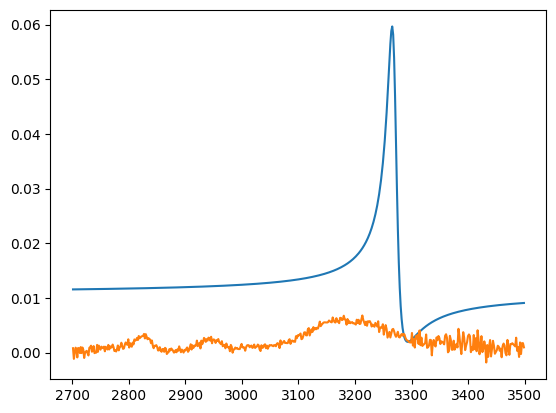

In [ ]:
plt.plot(filtered_data['Wavenumbers'],calcamplitude(**parameters))
plt.plot(filtered_data['Wavenumbers'],filtered_data['SFG'])

In [ ]:
fit = Minuit(cost0, **parameters)
# Ranges should only be positive
if 'nr_amplitude' in parameters:
  fit.limits["nr_amplitude"] = (0, None)
  fit.limits["nr_phase"] = (0, 2*np.pi)
for i in range(maxnres):
  if 'r'+str(i)+'_amplitude' in parameters:
    fit.limits['r'+str(i)+'_amplitude'] = (0, None)
    fit.limits['r'+str(i)+'_pos'] = (WMin, WMax)
    fit.limits['r'+str(i)+'_width'] = (0, None)


In [ ]:
# perform the fit
fit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.001572                   │              Nfcn = 159              │
│ EDM = 0.000142 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name         │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ nr_amplitude │    0.1    │    0.6    │            │            │    0    │         │       │
│ 1 │ nr_phase     │     1     │     5     │            │            │    0    │ 6.28319 │       │
│ 2 │ r0_amplitude │     0     │   0.8e3   │            │            │    0    │         │       │
│ 3 │ r0_pos       │   3.5e3   │   0.4e3   │            │            │  2700   │  3500   │       │
│ 4 │ r0_width     │    0e3    │    6e3    │            │            │    0    │         │       │
└───┴──────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────────┬──────────────────────────────────────────────────────────────────┐
│              │ nr_amplitude     nr_phase r0_amplitude       r0_pos     r0_width │
├──────────────┼──────────────────────────────────────────────────────────────────┤
│ nr_amplitude │         0.17      -185.92       -85.38        36.17       916.55 │
│     nr_phase │      -185.92     2.09e+06        1.0e6      -0.38e6       -8.8e6 │
│ r0_amplitude │       -85.38        1.0e6     5.21e+05      -0.19e6       -4.3e6 │
│       r0_pos │        36.17      -0.38e6      -0.19e6     1.14e+05       1.56e6 │
│     r0_width │       916.55       -8.8e6       -4.3e6       1.56e6     4.23e+07 │
└──────────────┴──────────────────────────────────────────────────────────────────┘

## More than one resonant peak

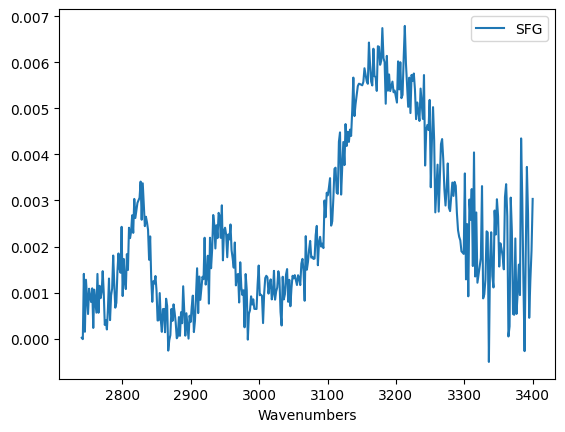

In [ ]:
# @title Resize the window of the spectrum { display-mode: "form" }
WMin = 2740 # @param {type:"number"}
WMax  = 3400 # @param {type:"number"}
filtered_data = data.query(f'Wavenumbers > {WMin} and Wavenumbers < {WMax}').copy()
filtered_data.plot('Wavenumbers','SFG')
wavenumbers = filtered_data['Wavenumbers'].values
sfg = filtered_data['SFG'].values

In [ ]:
# Parameters for each peak
nr = { "amplitude": 0.10399,
       "phase": np.pi }
r0 = { "amplitude" : 3,
       "pos" : 2870.,
       "width" : 20 }
r1 = { "amplitude": 7,
       "pos": 2800,
       "width": 50 }

In [ ]:
fitting_dictionaries = { 'nr' : nr, 'r0' : r0, 'r1' : r1 }
parameters = {}
for label, dictionary in fitting_dictionaries.items() :
  new = { label+'_'+k:v for k, v in dictionary.items()}
  parameters = {**parameters,**new}
print(parameters)

{'nr_amplitude': 0.10399, 'nr_phase': 3.141592653589793, 'r0_amplitude': 3, 'r0_pos': 2870.0, 'r0_width': 20, 'r1_amplitude': 7, 'r1_pos': 2800, 'r1_width': 50}


In [ ]:
def calcamplitude(**kwds):
  Chi = np.zeros(sfg.shape,dtype=np.complex128)
  if 'nr_amplitude' in kwds.keys():
    ChiNR = chi_non_resonant(kwds['nr_amplitude'], kwds['nr_phase'])
    Chi = Chi + ChiNR
  for i in range(maxnres):
    if 'r'+str(i)+'_amplitude' in kwds.keys():
       ChiR = chi_resonant(wavenumbers, kwds['r'+str(i)+'_amplitude'], kwds['r'+str(i)+'_pos'], kwds['r'+str(i)+'_width'])
       Chi = Chi + ChiR
  return np.square(Chi.real) + np.square(Chi.imag)

def calcimaginary(**kwds):
  Chi = np.zeros(sfg.shape,dtype=np.complex128)
  if 'nr_amplitude' in kwds.keys():
    ChiNR = chi_non_resonant(kwds['nr_amplitude'], kwds['nr_phase'])
    Chi = Chi + ChiNR
  for i in range(maxnres):
    if 'r'+str(i)+'_amplitude' in kwds.keys():
       ChiR = chi_resonant(wavenumbers, kwds['r'+str(i)+'_amplitude'], kwds['r'+str(i)+'_pos'], kwds['r'+str(i)+'_width'])
       Chi = Chi + ChiR
  return Chi.imag

def cost0(nr_amplitude, nr_phase, r0_amplitude, r0_pos, r0_width):
  return np.sum((sfg - calcamplitude(nr_amplitude=nr_amplitude, nr_phase=nr_phase, \
                                     r0_amplitude=r0_amplitude, r0_pos=r0_pos, r0_width=r0_width))**2)

def cost1(nr_amplitude, nr_phase, r0_amplitude, r0_pos, r0_width, r1_amplitude, r1_pos, r1_width ):
  return np.sum((sfg - calcamplitude(nr_amplitude=nr_amplitude, nr_phase=nr_phase, \
                                     r0_amplitude=r0_amplitude, r0_pos=r0_pos, r0_width=r0_width,\
                                     r1_amplitude=r1_amplitude, r1_pos=r1_pos, r1_width=r1_width\
                                     ))**2)

In [ ]:
fit = Minuit(cost1, **parameters)
# Ranges should only be positive
if 'nr_amplitude' in parameters:
  fit.limits["nr_amplitude"] = (0, None)
  fit.limits["nr_phase"] = (0, 2*np.pi)
for i in range(maxnres):
  if 'r'+str(i)+'_amplitude' in parameters:
    fit.limits['r'+str(i)+'_amplitude'] = (0, None)
    fit.limits['r'+str(i)+'_pos'] = (WMin, WMax)
    fit.limits['r'+str(i)+'_width'] = (0, None)

In [ ]:
fit.fixed["nr_phase"] = False
fit.fixed["r0_pos"] = False
fit.fixed["r1_pos"] = False

In [ ]:
# perform the fit
fit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.003396                   │              Nfcn = 368              │
│ EDM = 1.3e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name         │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ nr_amplitude │    0.1    │    1.5    │            │            │    0    │         │       │
│ 1 │ nr_phase     │     3     │     4     │            │            │    0    │ 6.28319 │       │
│ 2 │ r0_amplitude │     0     │    60     │            │            │    0    │         │       │
│ 3 │ r0_pos       │  2.87e3   │  0.15e3   │            │            │  2740   │  2900   │       │
│ 4 │ r0_width     │  0.03e3   │  0.22e3   │            │            │    0    │         │       │
│ 5 │ r1_amplitude │     0     │    40     │            │            │    0    │         │       │
│ 6 │ r1_pos       │  2.81e3   │  0.12e3   │            │            │  2740   │  2900   │       │
│ 7 │ r1_width     │  0.03e3   │  0.19e3   │            │            │    0    │         │       │
└───┴──────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│              │ nr_amplitude     nr_phase r0_amplitude       r0_pos     r0_width r1_amplitude       r1_pos     r1_width │
├──────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ nr_amplitude │        0.838         -2.0          4.8         81.5         -1.1        -23.0         62.7       -121.3 │
│     nr_phase │         -2.0     1.02e+03       -1.7e3        2.4e3       -4.4e3       -0.8e3       -2.5e3       -0.6e3 │
│ r0_amplitude │          4.8       -1.7e3     3.52e+03       -3.5e3       12.2e3        1.0e3        4.4e3       -0.7e3 │
│       r0_pos │         81.5        2.4e3       -3.5e3     1.98e+04     -0.008e6       -4.8e3            0     -0.017e6 │
│     r0_width │         -1.1       -4.4e3       12.2e3     -0.008e6     6.21e+04        1.5e3      0.010e6      -0.01e6 │
│ r1_amplitude │        -23.0       -0.8e3        1.0e3       -4.8e3        1.5e3     1.88e+03        0.2e3        7.8e3 │
│       r1_pos │         62.7       -2.5e3        4.4e3            0      0.010e6        0.2e3      1.3e+04     -0.006e6 │
│     r1_width │       -121.3       -0.6e3       -0.7e3     -0.017e6      -0.01e6        7.8e3     -0.006e6     5.06e+04 │
└──────────────┴─────────────────────────────────────────────────────────────────────────────────────────────────────────┘

Create a new dictionary with all the optimized parameters (a better version than before)

In [ ]:
optimized_parameters = dict(zip(parameters.keys(),[p.value for p in fit.params]))
optimized_parameters

{'nr_amplitude': 0.08242869703269744,
 'nr_phase': 2.9171389099036884,
 'r0_amplitude': 4.110933857083327,
 'r0_pos': 2872.573502633767,
 'r0_width': 29.416632328274954,
 'r1_amplitude': 4.160236349637577,
 'r1_pos': 2811.146093479905,
 'r1_width': 30.647701822635643}

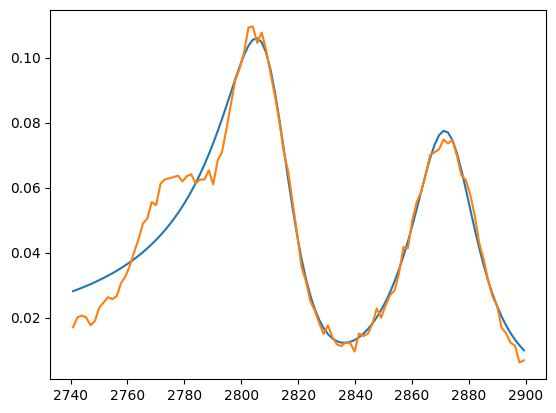

In [ ]:
plt.plot(filtered_data['Wavenumbers'],calcamplitude(**optimized_parameters))
plt.plot(filtered_data['Wavenumbers'],filtered_data['SFG'])

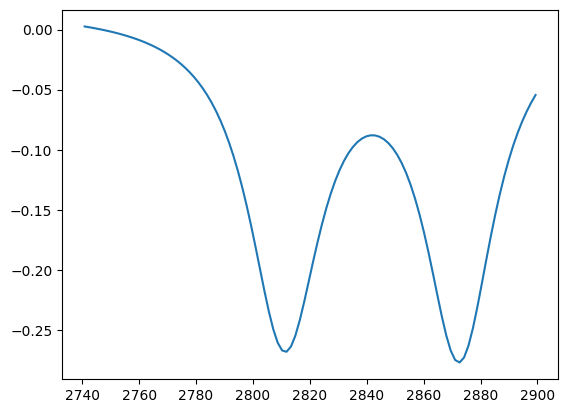

In [ ]:
plt.plot(filtered_data['Wavenumbers'],calcimaginary(**optimized_parameters))

## New attempt at a general cost function

Minuit documentation `help(Minuit)` explains that we can use costfunctions that depends on a variable number of arguments, provided they are positional arguments, I have a feeling that it does not work for keyword arguments. Thus, we can test using positional arguments `*args`, but for the time being we will assume that the arguments are ordered according to what we have done above (the first two are nonresonant parameters, then we have three parameters for each resonant function to add).

In [ ]:
def calcamplitude(*args):
  Chi = np.zeros(sfg.shape,dtype=np.complex128)
  Chi = Chi + chi_non_resonant(args[0], args[1])
  nres = (len(args)-2)//3
  for i in range(nres):
    iarg = 3*i+2
    ChiR = chi_resonant(wavenumbers, args[iarg], args[iarg+1], args[iarg+2])
    Chi = Chi + ChiR
  return np.square(Chi.real) + np.square(Chi.imag)

def calcimaginary(*args):
  Chi = np.zeros(sfg.shape,dtype=np.complex128)
  Chi = Chi + chi_non_resonant(args[0], args[1])
  nres = (len(args)-2)//3
  for i in range(nres):
    iarg = 3*i+2
    ChiR = chi_resonant(wavenumbers, args[iarg], args[iarg+1], args[iarg+2])
    Chi = Chi + ChiR
  return Chi.imag

def costfunction(*args):
  return np.sum((sfg - calcamplitude(*args))**2)

costfunction.errordef = Minuit.LEAST_SQUARES

 NOTE: from Minuit documentation it explains that if the costfunction is a least-squares type, it should have an attribute fcn.errordef set to 1. I believe this is the default value, so it should not matter if we set it or not, but it does no harm to set it. Also, Minuit.LEAST_SQUARES is just a constant equal to 1, to be used to this purpose.

```
 |  errordef
 |      Access FCN increment above minimum that corresponds to one standard deviation.
 |      
 |      Default value is 1.0. `errordef` should be 1.0 for a least-squares cost function
 |      and 0.5 for a negative log-likelihood function. See section 1.5.1 on page 6 of
 |      the :download:`MINUIT2 User's Guide <mnusersguide.pdf>`. This parameter is also
 |      called *UP* in MINUIT documents.
 |      
 |      If FCN has an attribute ``errordef``, its value is used automatically and you
 |      should not set errordef by hand. Doing so will raise a
 |      ErrordefAlreadySetWarning.
 |      
 |      For the builtin cost functions in :mod:`iminuit.cost`, you don't need to set
 |      this value, because they all have the ``errordef`` attribute set.
 |      
 |      To make user code more readable, we provided two named constants::
 |      
 |          m_lsq = Minuit(a_least_squares_function)
 |          m_lsq.errordef = Minuit.LEAST_SQUARES  # == 1

```

In [ ]:
# Parameters for each peak
# Change to parameters in water
nr = { "amplitude": 0.10399,
       "phase": np.pi }
r0 = { "amplitude" : 0.5,
       "pos" : 2800.,
       "width" : 20 }
r1 = { "amplitude": 0.5,
       "pos": 2950,
       "width": 20 }
r2 = { "amplitude": 1,
       "pos": 3200,
       "width": 40 }

Generate the full dictionary of parameters

In [ ]:
fitting_dictionaries = { 'nr' : nr, 'r0' : r0, 'r1' : r1, 'r2' : r2 }
parameters = {}
for label, dictionary in fitting_dictionaries.items() :
  new = { label+'_'+k:v for k, v in dictionary.items()}
  parameters = {**parameters,**new}
print(parameters)

{'nr_amplitude': 0.10399, 'nr_phase': 3.141592653589793, 'r0_amplitude': 0.5, 'r0_pos': 2800.0, 'r0_width': 20, 'r1_amplitude': 0.5, 'r1_pos': 2950, 'r1_width': 20, 'r2_amplitude': 1, 'r2_pos': 3200, 'r2_width': 40}


In [ ]:
fit = Minuit(costfunction, name=parameters.keys(), *parameters.values())

In [ ]:
# Ranges should only be positive
if 'nr_amplitude' in parameters:
  fit.limits["nr_amplitude"] = (0, None)
  fit.limits["nr_phase"] = (0, 2*np.pi)
for i in range(maxnres):
  if 'r'+str(i)+'_amplitude' in parameters:
    fit.limits['r'+str(i)+'_amplitude'] = (0, None)
    fit.limits['r'+str(i)+'_pos'] = (WMin, WMax)
    fit.limits['r'+str(i)+'_width'] = (0, None)

In [ ]:
# In case we want to keep a parameter fixed
fit.fixed["nr_phase"] = False

In [ ]:
# perform the fit
fit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.0003678                  │              Nfcn = 710              │
│ EDM = 5.09e-08 (Goal: 0.0002)    │            time = 0.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name         │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ nr_amplitude │    0.1    │    0.4    │            │            │    0    │         │       │
│ 1 │ nr_phase     │    1.7    │    3.5    │            │            │    0    │ 6.28319 │       │
│ 2 │ r0_amplitude │   14.1    │    2.0    │            │            │    0    │         │       │
│ 3 │ r0_pos       │   2.7e3   │   0.5e3   │            │            │  2740   │  3400   │       │
│ 4 │ r0_width     │   426.7   │    2.0    │            │            │    0    │         │       │
│ 5 │ r1_amplitude │    2.8    │    1.9    │            │            │    0    │         │       │
│ 6 │ r1_pos       │   3.0e3   │   0.5e3   │            │            │  2740   │  3400   │       │
│ 7 │ r1_width     │   177.7   │    2.0    │            │            │    0    │         │       │
│ 8 │ r2_amplitude │    3.9    │    2.0    │            │            │    0    │         │       │
│ 9 │ r2_pos       │   3.4e3   │   0.6e3   │            │            │  2740   │  3400   │       │
│ 10│ r2_width     │   155.5   │    2.0    │            │            │    0    │         │       │
└───┴──────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────────┬────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│              │ nr_amplitude     nr_phase r0_amplitude       r0_pos     r0_width r1_amplitude       r1_pos     r1_width r2_amplitude       r2_pos     r2_width │
├──────────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ nr_amplitude │        0.198         0.37         0.00         0.36          0.0         0.01         8.42          0.0         0.01        -4.94         -0.0 │
│     nr_phase │         0.37         28.4            0           -0           -0           -0         -106            0           -0          -13            0 │
│ r0_amplitude │         0.00            0         3.98           -0            0           -0            1           -0            0            0           -0 │
│       r0_pos │         0.36           -0           -0     6.62e+03           -0           -0          0e3            0            0          0e3           -0 │
│     r0_width │          0.0           -0            0           -0            4           -0           -0            0           -0            0            0 │
│ r1_amplitude │         0.01           -0           -0           -0           -0         3.72           -0            0            0            0           -0 │
│       r1_pos │         8.42         -106            1          0e3           -0           -0     4.15e+05           -0           -1            

In [ ]:
optimized_parameters = dict(zip(parameters.keys(),[p.value for p in fit.params]))
optimized_parameters

{'nr_amplitude': 0.09620871749660975,
 'nr_phase': 1.6930043557728485,
 'r0_amplitude': 14.095653806031233,
 'r0_pos': 2742.5177802273734,
 'r0_width': 426.72285698346315,
 'r1_amplitude': 2.8209608423927244,
 'r1_pos': 3030.2081885245507,
 'r1_width': 177.73991616058075,
 'r2_amplitude': 3.854677982173319,
 'r2_pos': 3366.166791238995,
 'r2_width': 155.5012190696523}

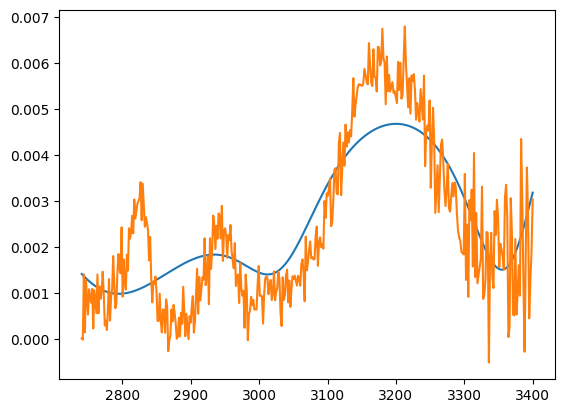

In [ ]:
plt.plot(filtered_data['Wavenumbers'],calcamplitude(*optimized_parameters.values()))
plt.plot(filtered_data['Wavenumbers'],filtered_data['SFG'])

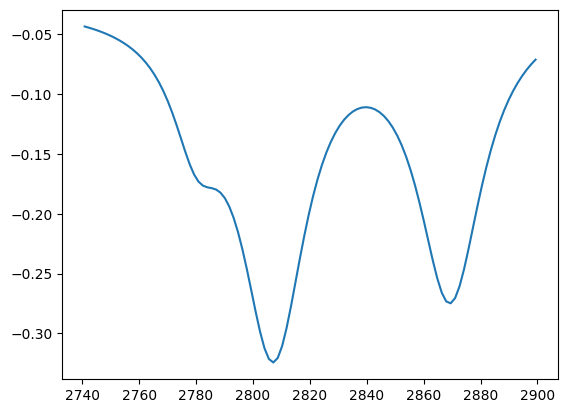

In [ ]:
plt.plot(filtered_data['Wavenumbers'],calcimaginary(*optimized_parameters.values()))

## Currying the cost function
This approach allows to associate the data (wavenumber and sfg) to the cost function so that there is no potential issue of which data is used in the fit

In [ ]:
from typing import Callable
def curry(data: np.ndarray, func: Callable) -> Callable :

  def curriedfunc(*args):
    return func(data, *args)

  return curriedfunc

def costfunction_of_sfg(sfg: np.ndarray[np.float64], *args) -> np.float64 :
  return np.sum((sfg - calcamplitude(*args))**2)

def calcamplitude_of_wavenumbers(wavenumbers: np.ndarray[np.float64], *args) -> np.ndarray[np.float64] :
  Chi = np.zeros(wavenumbers.shape,dtype=np.complex128)
  Chi = Chi + chi_non_resonant(args[0], args[1])
  nres = (len(args)-2)//3
  for i in range(nres):
    iarg = 3*i+2
    ChiR = chi_resonant(wavenumbers, args[iarg], args[iarg+1], args[iarg+2])
    Chi = Chi + ChiR
  return np.square(Chi.real) + np.square(Chi.imag)

def calcimaginary_of_wavenumbers(wavenumbers: np.ndarray[np.float64], *args) -> np.ndarray[np.float64]:
  Chi = np.zeros(wavenumbers.shape,dtype=np.complex128)
  Chi = Chi + chi_non_resonant(args[0], args[1])
  nres = (len(args)-2)//3
  for i in range(nres):
    iarg = 3*i+2
    ChiR = chi_resonant(wavenumbers, args[iarg], args[iarg+1], args[iarg+2])
    Chi = Chi + ChiR
  return Chi.imag

Whenever we filter the data and generate the two arrays of `wavenumbers` and `sfg`, we should execute the following cell to create the corresponding functions in that interval

In [ ]:
calcamplitude = curry(wavenumbers,calcamplitude_of_wavenumbers)
calcimaginary = curry(wavenumbers,calcimaginary_of_wavenumbers)
costfunction = curry(sfg,costfunction_of_sfg)
costfunction.errordef = Minuit.LEAST_SQUARES

In [ ]:
fit = Minuit(costfunction, name=parameters.keys(), *parameters.values())

In [ ]:
# Ranges should only be positive
if 'nr_amplitude' in parameters:
  fit.limits["nr_amplitude"] = (0, None)
  fit.limits["nr_phase"] = (0, 2*np.pi)
for i in range((len(parameters)-2)//3):
  if 'r'+str(i)+'_amplitude' in parameters:
    fit.limits['r'+str(i)+'_amplitude'] = (0, None)
    fit.limits['r'+str(i)+'_pos'] = (WMin, WMax)
    fit.limits['r'+str(i)+'_width'] = (0, None)

In [ ]:
# perform the fit
fit.migrad()
optimized_parameters = dict(zip(parameters.keys(),[p.value for p in fit.params]))

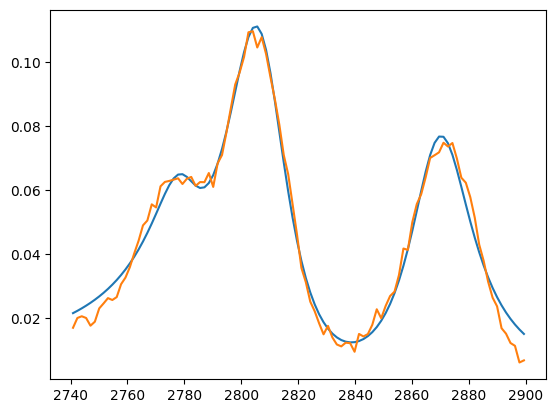

In [ ]:
plt.plot(filtered_data['Wavenumbers'],calcamplitude(*optimized_parameters.values()))
plt.plot(filtered_data['Wavenumbers'],filtered_data['SFG'])

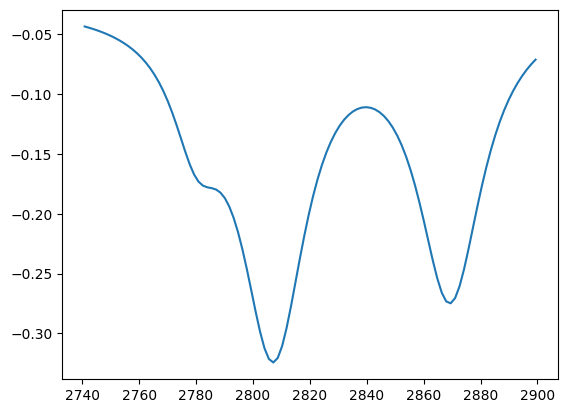

In [ ]:
plt.plot(filtered_data['Wavenumbers'],calcimaginary(*optimized_parameters.values()))

## Combine everything to fit six resonances

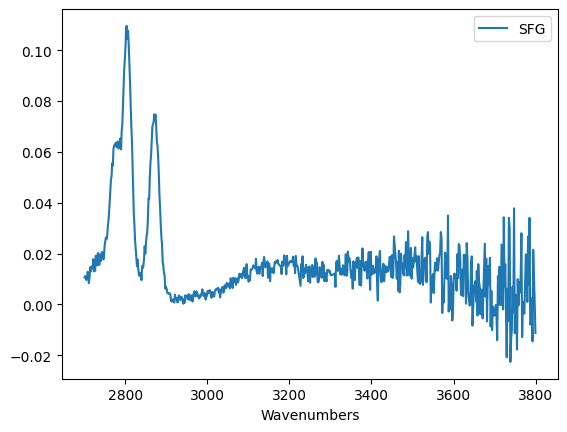

In [ ]:
# @title Resize the window of the spectrum { display-mode: "form" }
WMin = 2700 # @param {type:"number"}
WMax  = 3800 # @param {type:"number"}
filtered_data = data.query(f'Wavenumbers > {WMin} and Wavenumbers < {WMax}').copy()
filtered_data.plot('Wavenumbers','SFG')
wavenumbers = filtered_data['Wavenumbers'].values
sfg = filtered_data['SFG'].values

In [ ]:
calcamplitude = curry(wavenumbers,calcamplitude_of_wavenumbers)
calcimaginary = curry(wavenumbers,calcimaginary_of_wavenumbers)
costfunction = curry(sfg,costfunction_of_sfg)
costfunction.errordef = Minuit.LEAST_SQUARES

In [ ]:
# Parameters for each peak
# Change to parameters in water
nr = { "amplitude": 0.10399,
       "phase": np.pi }
r0 = { "amplitude" : 3,
       "pos" : 2870.,
       "width" : 20 }
r1 = { "amplitude": 7,
       "pos": 2800,
       "width": 50 }
r2 = { "amplitude": 4,
       "pos": 2780,
       "width": 20 }
r3 = { "amplitude": 1,
       "pos": 3100,
       "width": 50 }
r4 = { "amplitude": 1,
       "pos": 3350,
       "width": 50 }
r5 = { "amplitude": 1,
       "pos": 3500,
       "width": 50 }

resonant_list = [r0, r1, r2, r3, r4, r5]

In [ ]:
# Let's assume that we will always have a nonresonant dictionary plus a list of resonant dictionaries
# NOTE: this function allows to have different names for the resonant peak dictionaries
# and we can select which ones we add when we call the function
def combine_params( nonresonant_params: dict, resonant_list: list[dict] ) -> dict :
  # start with the nonresonant parameters
  parameters = { 'nr_'+k: v for k,v in nonresonant_params.items() }
  # add the resonant parameters naming them r1_ , r2_ , r3_, ...
  nres = len(resonant_list)
  for i, resonant_params in enumerate(resonant_list):
    new = {'r'+str(i)+'_'+k:v for k,v in resonant_params.items() }
    parameters = {**parameters, **new}
  return parameters

In [ ]:
combine_params( nr, [r0, r1, r2, r3, r4, r5]) # NOTE: the names in this list may not correspond to the final names of the parameters, if you change the order

{'nr_amplitude': 0.10399,
 'nr_phase': 3.141592653589793,
 'r0_amplitude': 3,
 'r0_pos': 2870.0,
 'r0_width': 20,
 'r1_amplitude': 7,
 'r1_pos': 2800,
 'r1_width': 50,
 'r2_amplitude': 4,
 'r2_pos': 2780,
 'r2_width': 20,
 'r3_amplitude': 1,
 'r3_pos': 3100,
 'r3_width': 50,
 'r4_amplitude': 1,
 'r4_pos': 3350,
 'r4_width': 50,
 'r5_amplitude': 1,
 'r5_pos': 3500,
 'r5_width': 50}

In [ ]:
parameters = combine_params(nr, resonant_list)
print(parameters)

{'nr_amplitude': 0.10399, 'nr_phase': 3.141592653589793, 'r0_amplitude': 3, 'r0_pos': 2870.0, 'r0_width': 20, 'r1_amplitude': 7, 'r1_pos': 2800, 'r1_width': 50, 'r2_amplitude': 4, 'r2_pos': 2780, 'r2_width': 20, 'r3_amplitude': 1, 'r3_pos': 3100, 'r3_width': 50, 'r4_amplitude': 1, 'r4_pos': 3350, 'r4_width': 50, 'r5_amplitude': 1, 'r5_pos': 3500, 'r5_width': 50}


In [ ]:
fit = Minuit(costfunction, name=parameters.keys(), *parameters.values())

In [ ]:
# Ranges should only be positive
if 'nr_amplitude' in parameters:
  fit.limits["nr_amplitude"] = (0, None)
  fit.limits["nr_phase"] = (0, 2*np.pi)
for i in range((len(parameters)-2//3)):
  if 'r'+str(i)+'_amplitude' in parameters:
    fit.limits['r'+str(i)+'_amplitude'] = (0, None)
    fit.limits['r'+str(i)+'_pos'] = (WMin, WMax)
    fit.limits['r'+str(i)+'_width'] = (0, None)

In [ ]:
fit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.02516                    │             Nfcn = 3418              │
│ EDM = 3.37e-05 (Goal: 0.0002)    │            time = 0.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name         │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ nr_amplitude │     0     │    20     │            │            │    0    │         │       │
│ 1 │ nr_phase     │    1.3    │    3.5    │            │            │    0    │ 6.28319 │       │
│ 2 │ r0_amplitude │     3     │    12     │            │            │    0    │         │       │
│ 3 │ r0_pos       │  2.87e3   │  0.18e3   │            │            │  2700   │  3800   │       │
│ 4 │ r0_width     │  0.03e3   │  0.11e3   │            │            │    0    │         │       │
│ 5 │ r1_amplitude │     4     │    20     │            │            │    0    │         │       │
│ 6 │ r1_pos       │  2.81e3   │  0.11e3   │            │            │  2700   │  3800   │       │
│ 7 │ r1_width     │    30     │    80     │            │            │    0    │         │       │
│ 8 │ r2_amplitude │     0     │    40     │            │            │    0    │         │       │
│ 9 │ r2_pos       │  2.78e3   │  0.14e3   │            │            │  2700   │  3800   │       │
│ 10│ r2_width     │     0     │   0.4e3   │            │            │    0    │         │       │
│ 11│ r3_amplitude │  0.02e3   │  0.14e3   │            │            │    0    │         │       │
│ 12│ r3_pos       │   3.4e3   │   0.9e3   │            │            │  2700   │  3800   │       │
│ 13│ r3_width     │    0e3    │    4e3    │            │            │    0    │         │       │
│ 14│ r4_amplitude │  0.01e3   │  0.15e3   │            │            │    0    │         │       │
│ 15│ r4_pos       │   3.2e3   │   0.6e3   │            │            │  2700   │  3800   │       │
│ 16│ r4_width     │   0.2e3   │   2.3e3   │            │            │    0    │         │       │
│ 17│ r5_amplitude │     0     │  0.14e3   │            │            │    0    │         │       │
│ 18│ r5_pos       │   3.5e3   │   0.6e3   │            │            │  2700   │  3800   │       │
│ 19│ r5_width     │    0e3    │    4e3    │            │            │    0    │         │       │
└───┴──────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│              │ nr_amplitude     nr_phase r0_amplitude       r0_pos     r0_width r1_amplitude       r1_pos     r1_width r2_amplitude       r2_pos     r2_width r3_amplitude       r3_pos     r3_width r4_amplitude       r4_pos     r4_width r5_amplitude       r5_pos     r5_width │
├──────────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [ ]:
optimized_parameters = dict(zip(parameters.keys(),[p.value for p in fit.params]))

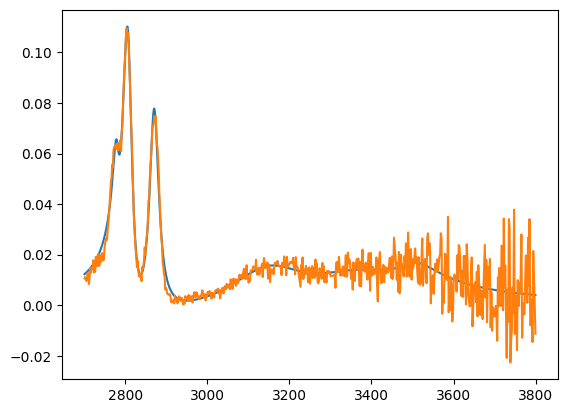

In [ ]:
plt.plot(filtered_data['Wavenumbers'],calcamplitude(*optimized_parameters.values()))
plt.plot(filtered_data['Wavenumbers'],filtered_data['SFG'])

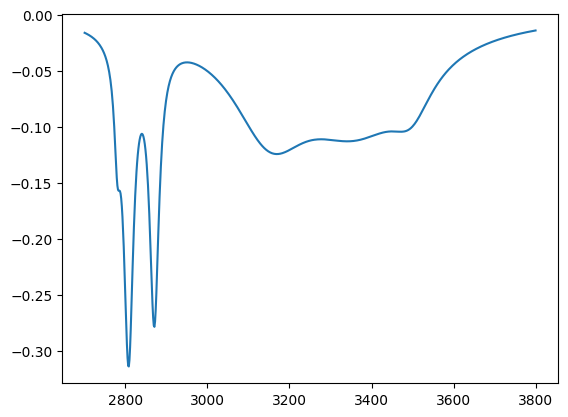

In [ ]:
plt.plot(filtered_data['Wavenumbers'],calcimaginary(*optimized_parameters.values()))